In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Machine learning\Dt and Rf\diabetes.csv')
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [2]:
# finding the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

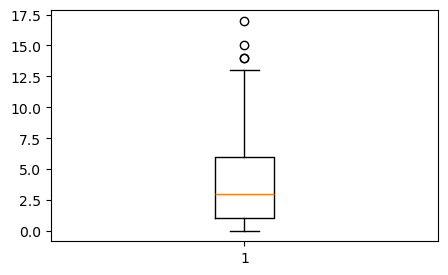

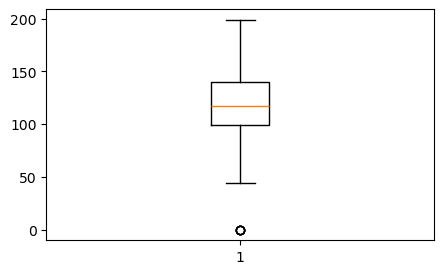

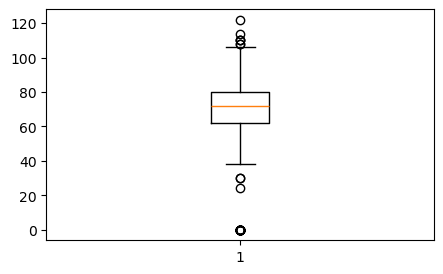

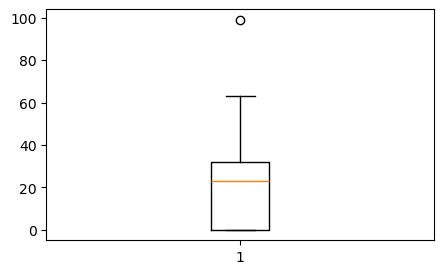

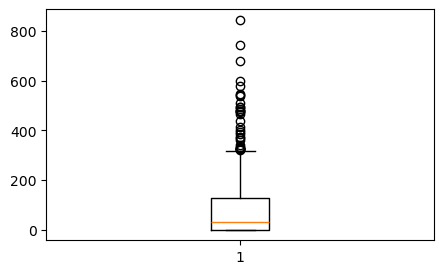

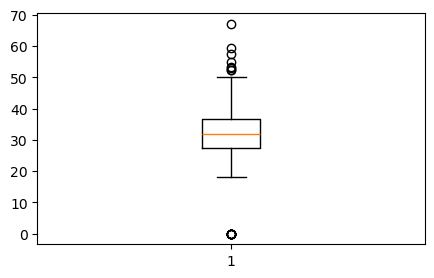

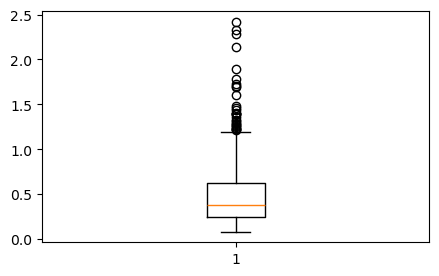

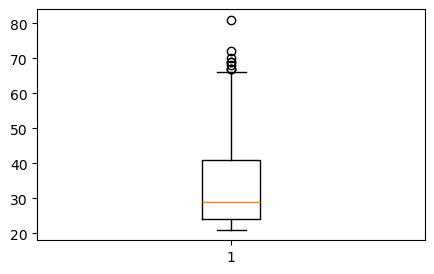

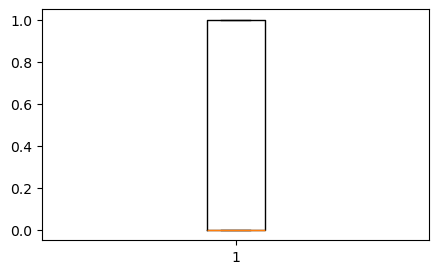

In [4]:
# finding outliers
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    plt.figure(figsize=(5,3))
    plt.boxplot(x=df[i])
    plt.show()

In [5]:
# creating function to treat outliers
def treat_outiers(f):
    import numpy as np
    for i in f.columns:
        if df[i].dtype in ['float64', 'int64']:
            Q1 =  f[i].quantile(0.25)
            Q3 = f[i].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5*IQR
            upper_bound = Q3 + 1.5*IQR
            f[i] = np.where(f[i] < lower_bound, lower_bound, np.where(f[i] > upper_bound, upper_bound, f[i]))
    return f

In [6]:
treat_outiers(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


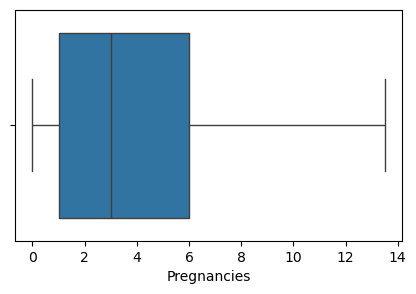

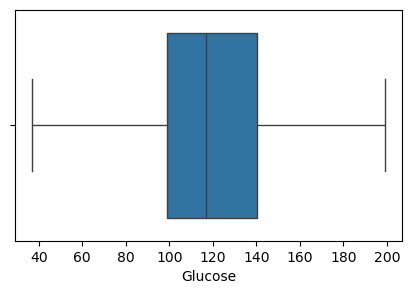

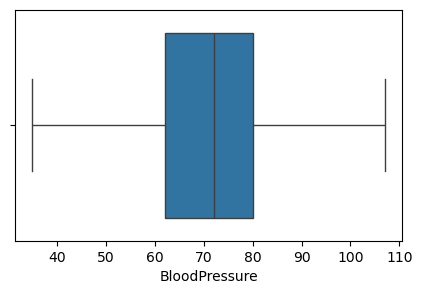

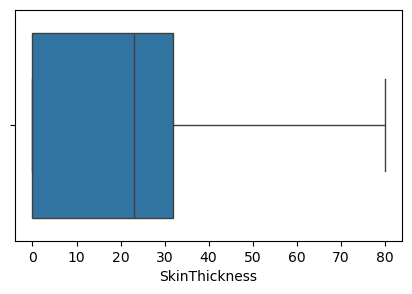

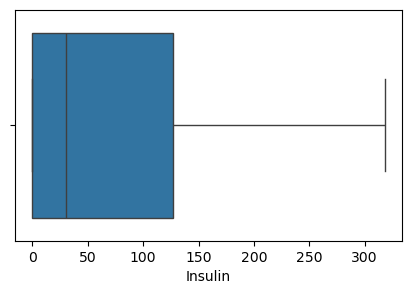

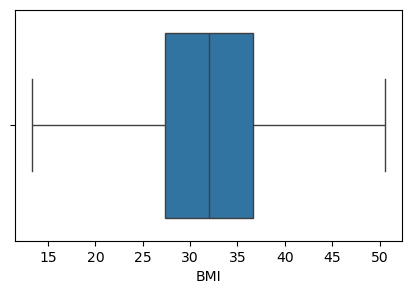

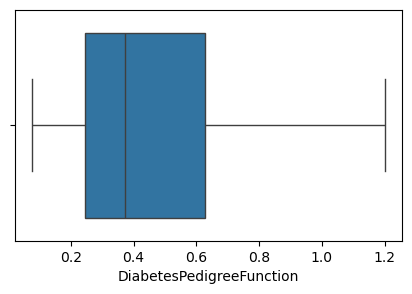

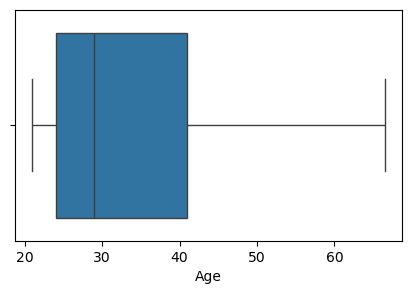

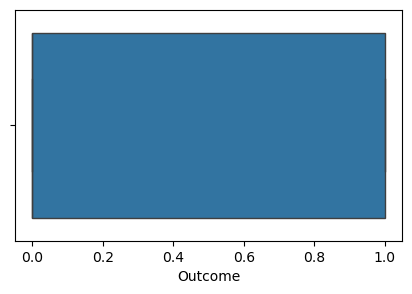

In [7]:
#checking outliers again to see if my function replaced values efficiently or not
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[i])
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split
# sepearting dependant and independant variables
x = df.drop('Outcome', axis=1)
y = df['Outcome']

# I will split the data into 70% training 30 % testing 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
#stratify=y ensures that the train and test sets have the same class proportions (like 0s and 1s) as the original dataset.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [9]:
# scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_stand = sc.fit_transform(x_train)
x_test_stand  = sc.transform(x_test)

In [10]:
#balancing the data split using SMOTE. It will create more rows for the categories which has less data, to balance

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_bal, y_train_bal = sm.fit_resample(x_train_stand, y_train)

In [11]:
# before and after SMOTE
from collections import Counter
print('Before SMOTE', Counter(y_train))
print('After SMOTE', Counter(y_train_bal))

Before SMOTE Counter({0.0: 350, 1.0: 187})
After SMOTE Counter({1.0: 350, 0.0: 350})


In [26]:
# training the model
from sklearn.svm import SVC

# base model
sv = SVC(kernel='rbf', C = 1, gamma = 'scale', probability = True, random_state=42)
sv.fit(x_train_bal, y_train_bal)



SVC(C=1, probability=True, random_state=42)

-Kernel I used rbf, always best. It will transform the data into a higher dimension space to seperate non linear data.

-C - Controls the trade-off between maximizing the margin and minimizing classification errors.
For my model I have taken C = 1, it's moderate and it will keep a balanced margin.

-Gamma I have taken scale which will automitically chose a balanced gamma based on the data. Its neighter too high or low.

- Randon state will make tghe split same each timme


In [27]:
# lets check can it predit well or not

y_predict = sv.predict(x_test_stand)

In [28]:
#checking scores for underfitting / overfitting
print(sv.score(x_train_bal,y_train_bal))
print(sv.score(x_test_stand,y_test))

0.8414285714285714
0.7532467532467533


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(y_test, y_predict)
confusion_matrix = confusion_matrix(y_test, y_predict)
classification_report = classification_report(y_test, y_predict)

print(f'accuracy_score is {accuracy_score}')
print(f'confusion_matrix is {confusion_matrix}')
print(f'classification_report is {classification_report}')

accuracy_score is 0.7532467532467533
confusion_matrix is [[116  34]
 [ 23  58]]
classification_report is               precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       150
         1.0       0.63      0.72      0.67        81

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.75      0.76       231

